In [65]:
!pip install kaggle

In [49]:
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
from scipy import stats
path = kagglehub.dataset_download("prince7489/car-price-prediction-dataset")
for file in os.listdir(path):
    print(f" - {file}")
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

 - car_price_dataset_medium.csv


In [50]:
file_path = os.path.join(path, csv_files[0])
df = pd.read_csv(file_path)
df.head()

,Car_ID,Brand,Model_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
0,1,Audi,2005,197018,Diesel,Manual,First,4046,223.6,29.61,6,119611.94
1,2,BMW,2019,43467,Hybrid,Automatic,First,3731,248.4,21.66,5,90842.46
2,3,Kia,2012,153697,Hybrid,Automatic,Third,4925,465.5,12.14,6,78432.24
3,4,Mercedes,2015,38893,Petrol,Automatic,Second,3771,229.7,19.65,6,44568.89
4,5,Audi,2016,81329,Hybrid,Automatic,First,2817,573.2,7.74,5,8751.82


In [51]:
df.columns.tolist()

['Car_ID',
 'Brand',
 'Model_Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Engine_CC',
 'Max_Power_bhp',
 'Mileage_kmpl',
 'Seats',
 'Price_USD']

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             1000 non-null   int64  
 1   Brand              1000 non-null   object 
 2   Model_Year         1000 non-null   int64  
 3   Kilometers_Driven  1000 non-null   int64  
 4   Fuel_Type          1000 non-null   object 
 5   Transmission       1000 non-null   object 
 6   Owner_Type         1000 non-null   object 
 7   Engine_CC          1000 non-null   int64  
 8   Max_Power_bhp      1000 non-null   float64
 9   Mileage_kmpl       1000 non-null   float64
 10  Seats              1000 non-null   int64  
 11  Price_USD          1000 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 93.9+ KB


In [53]:
print(df['Brand'].unique()[:10])

['Audi' 'BMW' 'Kia' 'Mercedes' 'Volkswagen' 'Ford' 'Hyundai' 'Honda'
 'Toyota' 'Nissan']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Audi'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Kia'),
  Text(3, 0, 'Mercedes'),
  Text(4, 0, 'Volkswagen'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Hyundai'),
  Text(7, 0, 'Honda'),
  Text(8, 0, 'Toyota'),
  Text(9, 0, 'Nissan')])

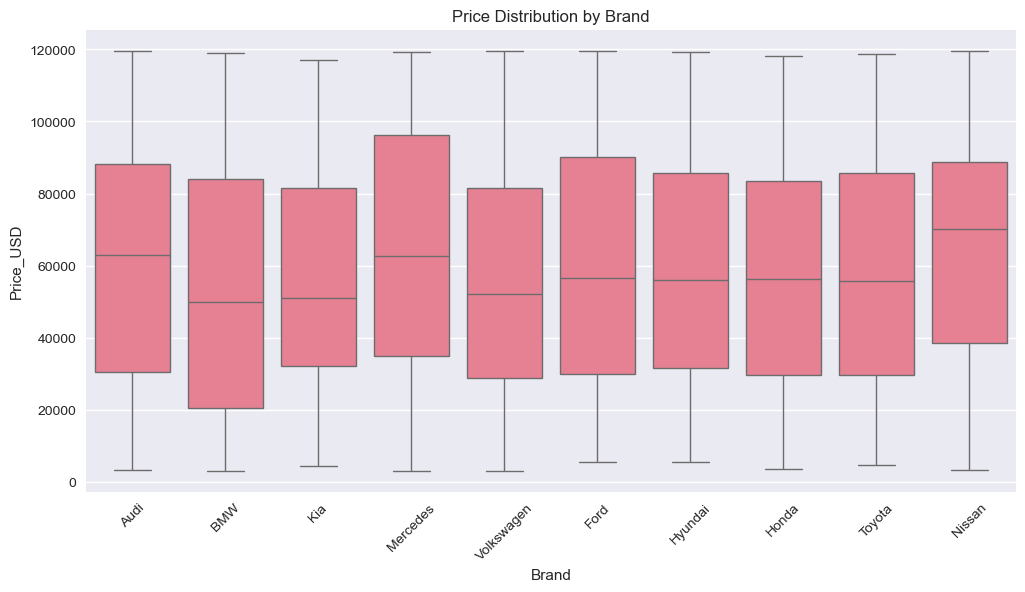

In [54]:
plt.figure(figsize=(12,6))
plt.title("Price Distribution by Brand")
sns.boxplot(data=df, x='Brand', y='Price_USD')
plt.xticks(rotation=45)

<Axes: title={'center': 'Car age vs price'}, xlabel='car_age', ylabel='Price_USD'>

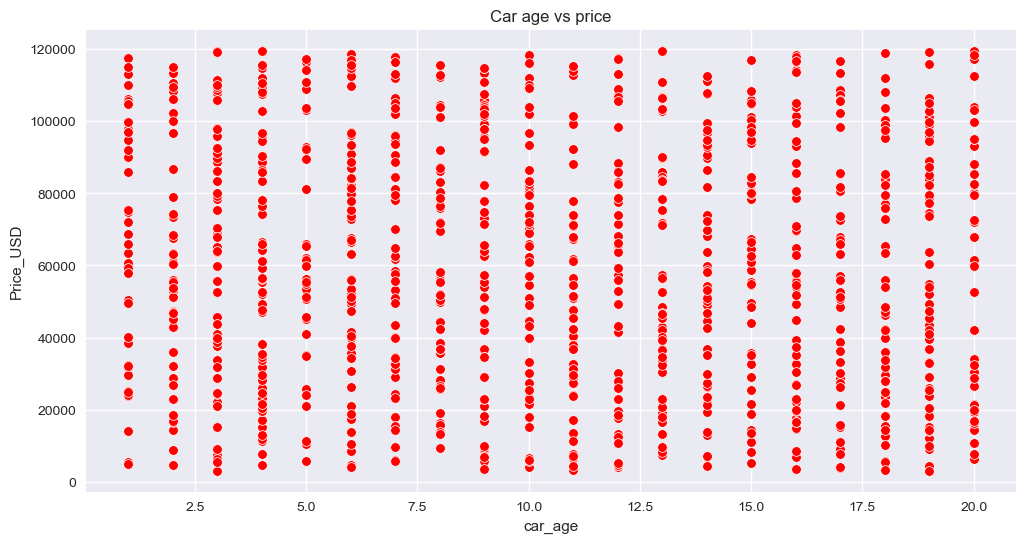

In [55]:
plt.figure(figsize=(12,6))
plt.title("Car age vs price")
df['car_age'] = 2025 - df['Model_Year']
sns.scatterplot(x=df['car_age'], y=df['Price_USD'],color='red')

Text(0.5, 0, 'Price ($)')

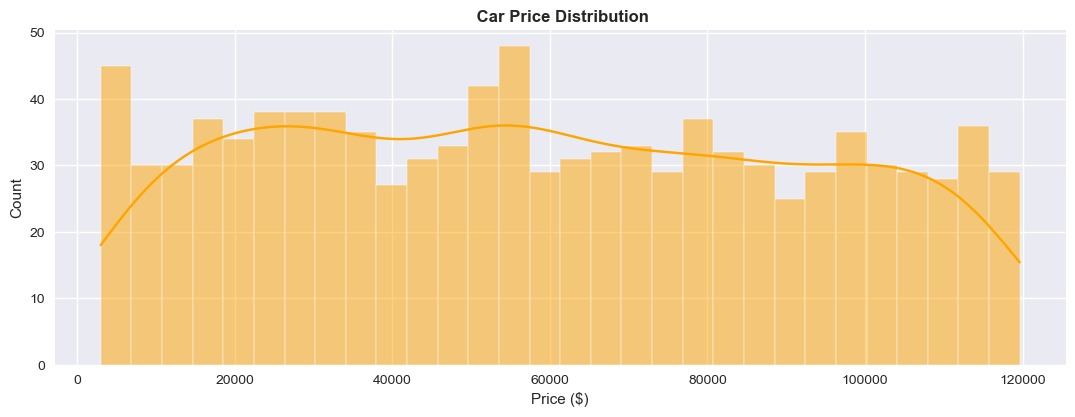

In [56]:
plt.figure(figsize=(60,20))
plt.subplot(4, 4, 1)
sns.histplot(data=df, x='Price_USD', bins=30, kde=True,color='orange')
plt.title(' Car Price Distribution', fontweight='bold')
plt.xlabel('Price ($)')

Text(0.5, 1.0, ' Price Boxplot')

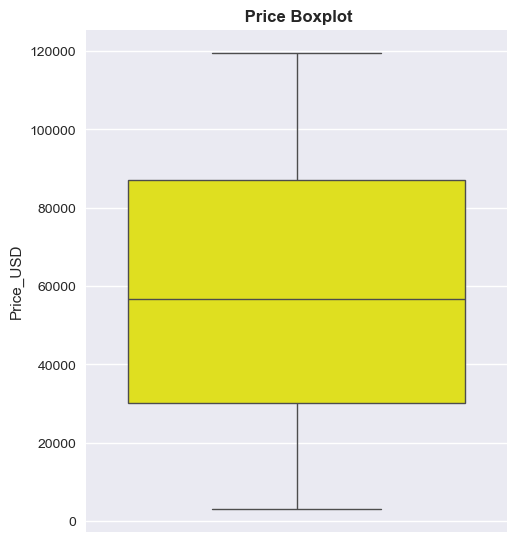

In [57]:
plt.figure(figsize=(25,30))
plt.subplot(4, 4, 2)
sns.boxplot(data=df, y='Price_USD',color='yellow')
plt.title(' Price Boxplot', fontweight='bold')

Text(0.5, 1.0, ' Price by Fuel Type')

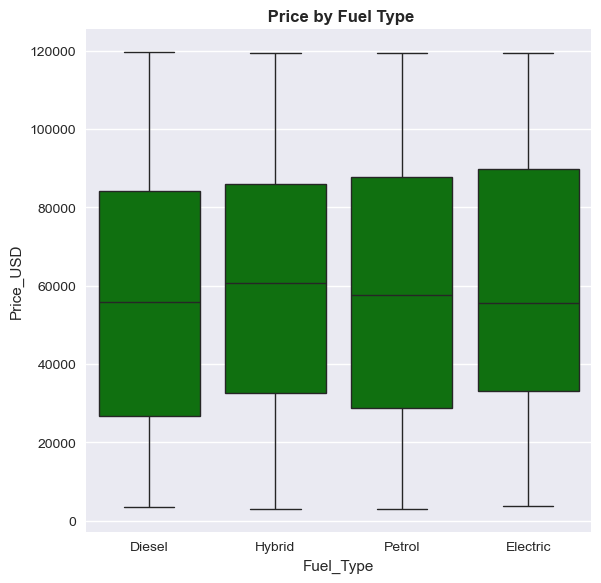

In [58]:
plt.figure(figsize=(30,30))
plt.subplot(4, 4, 3)
sns.boxplot(data=df, x='Fuel_Type', y='Price_USD',color='green')
plt.title(' Price by Fuel Type', fontweight='bold')

Text(0.5, 0, 'Engine Size (cc)')

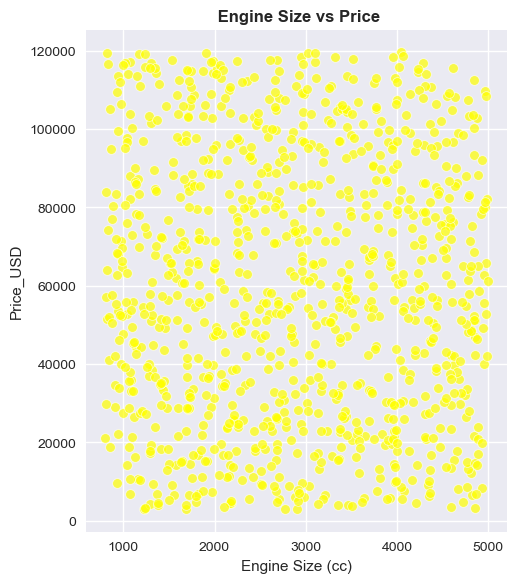

In [59]:
plt.figure(figsize=(25,30))
plt.subplot(4, 4, 5)
sns.scatterplot(data=df, x='Engine_CC', y='Price_USD', alpha=0.7,color='yellow')
plt.title(' Engine Size vs Price', fontweight='bold')
plt.xlabel('Engine Size (cc)')

Text(0.5, 0, 'Horsepower')

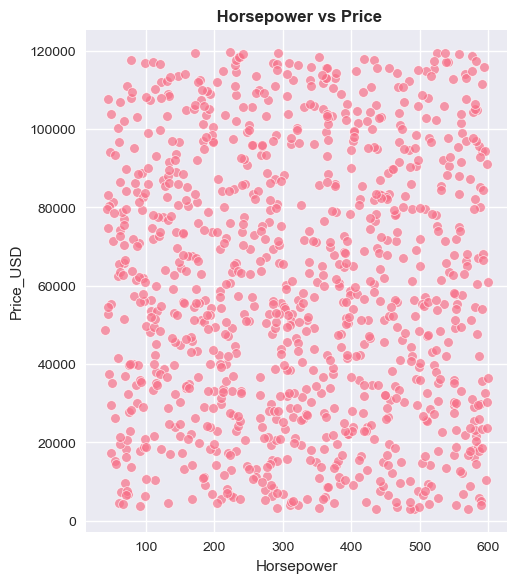

In [60]:
plt.figure(figsize=(25,30))
plt.subplot(4, 4, 6)
sns.scatterplot(data=df, x='Max_Power_bhp', y='Price_USD', alpha=0.7)
plt.title(' Horsepower vs Price', fontweight='bold')
plt.xlabel('Horsepower')

Text(0.5, 0, 'City MPG')

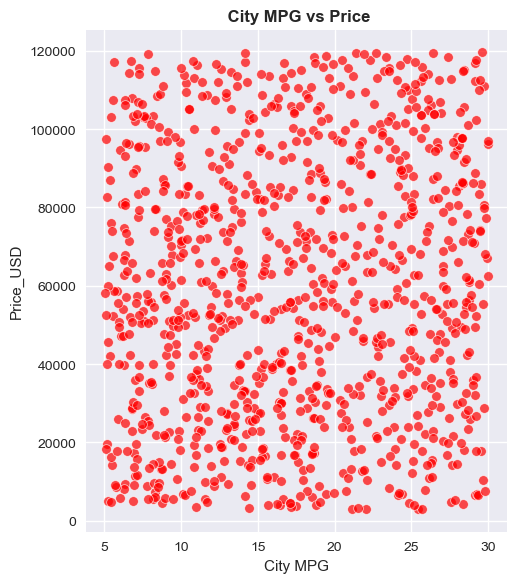

In [61]:
plt.figure(figsize=(25,30))
plt.subplot(4, 4, 8)
sns.scatterplot(data=df, x='Mileage_kmpl', y='Price_USD', alpha=0.7,color='red')
plt.title(' City MPG vs Price', fontweight='bold')
plt.xlabel('City MPG')

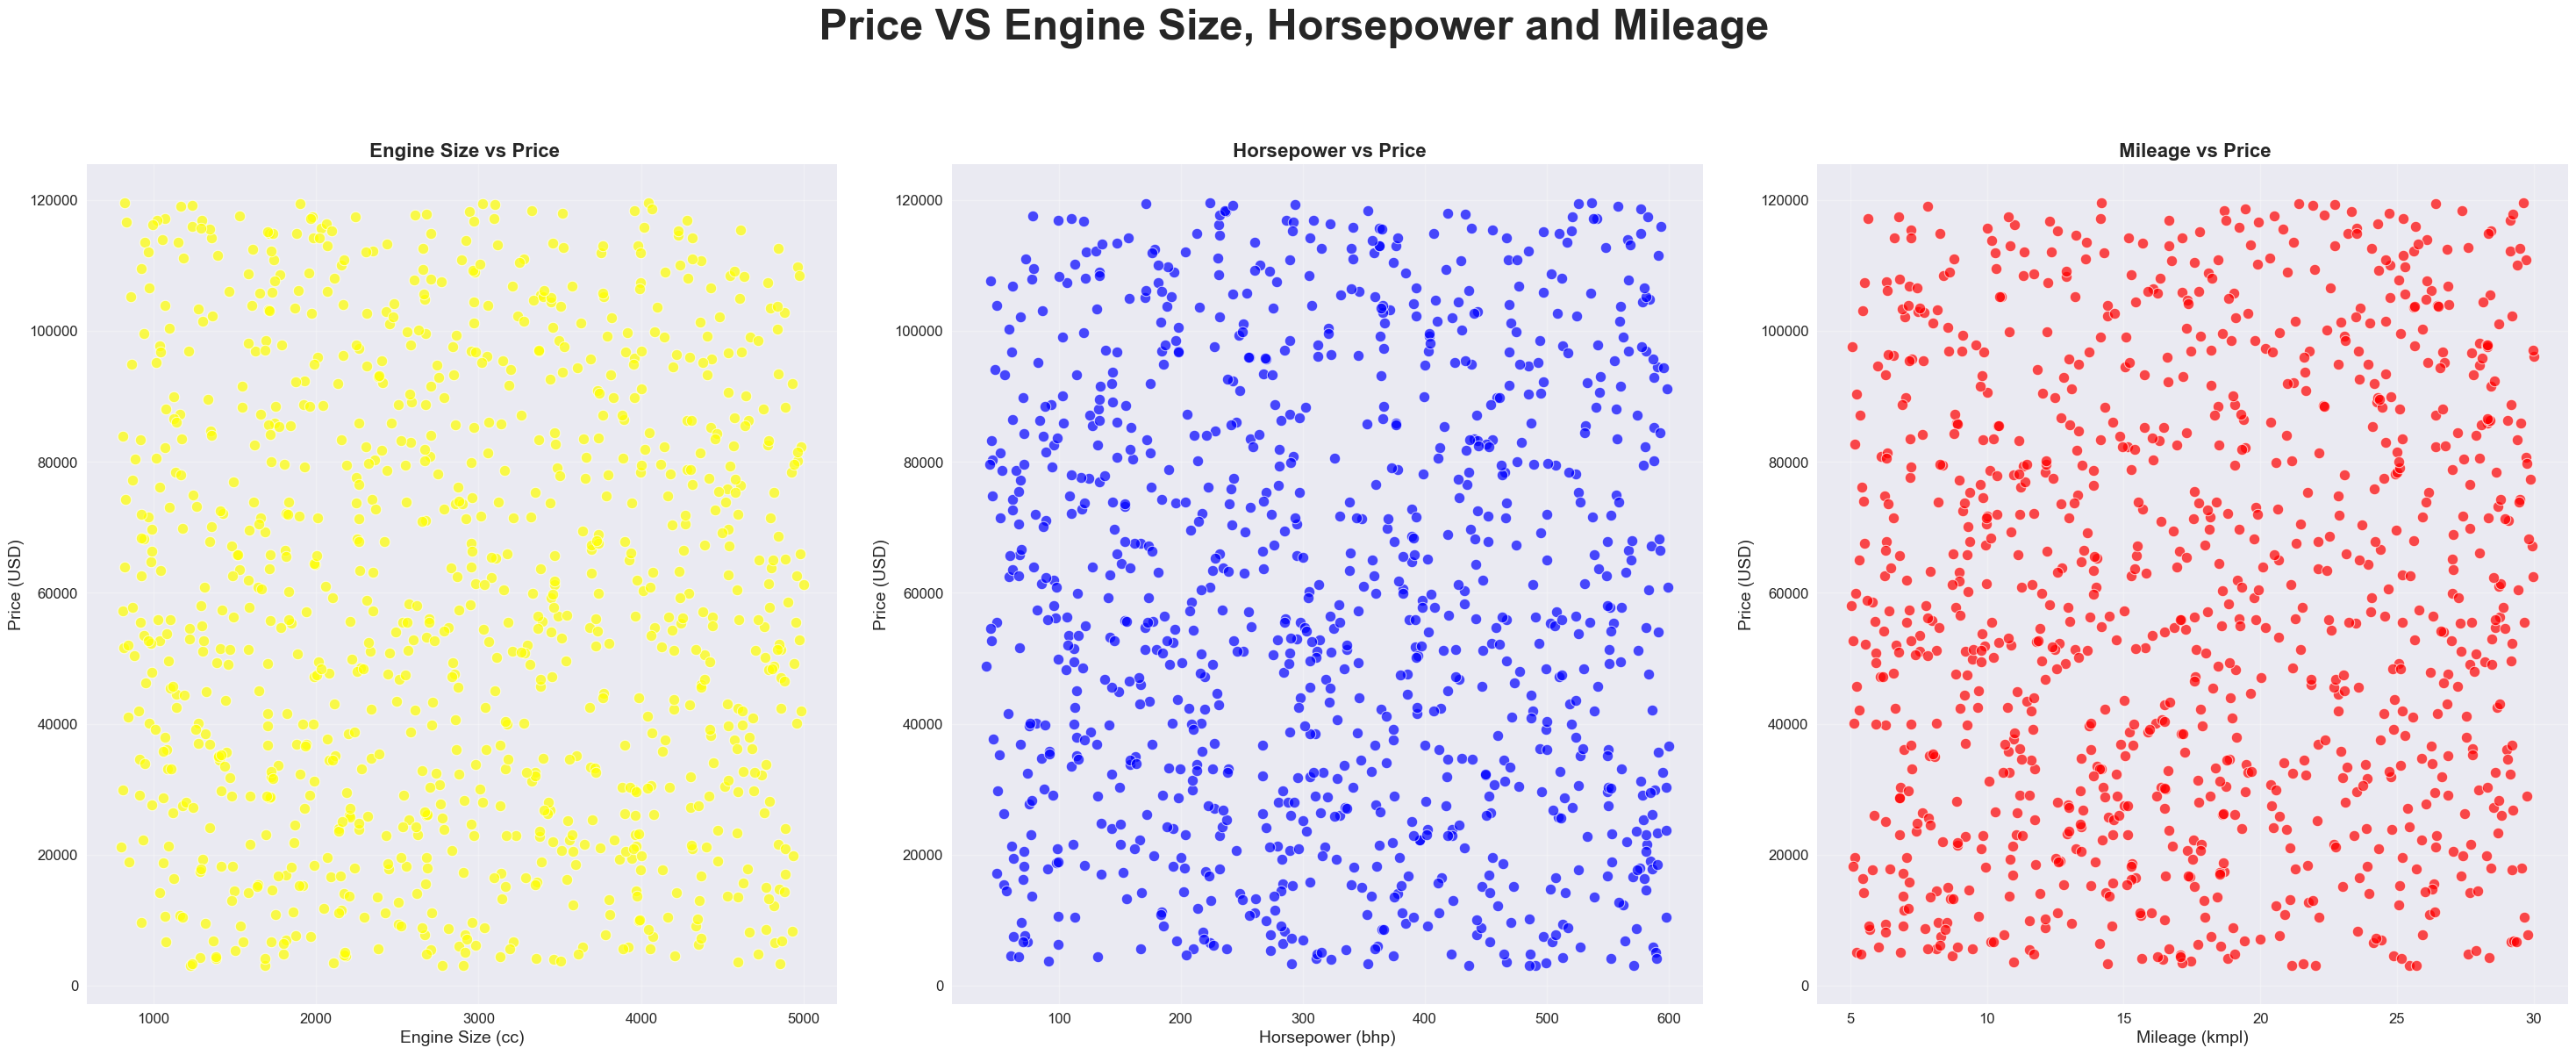

In [62]:
plt.figure(figsize=(30, 12))
plt.suptitle(' Price VS Engine Size, Horsepower and Mileage', 
             fontweight='bold', fontsize=35, y=1.02)
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Engine_CC', y='Price_USD', alpha=0.7, color='yellow', s=80)
plt.title(' Engine Size vs Price', fontweight='bold', fontsize=16)
plt.xlabel('Engine Size (cc)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Max_Power_bhp', y='Price_USD', alpha=0.7, color='blue', s=80)
plt.title(' Horsepower vs Price', fontweight='bold', fontsize=16)
plt.xlabel('Horsepower (bhp)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Mileage_kmpl', y='Price_USD', alpha=0.7, color='red', s=80)
plt.title(' Mileage vs Price', fontweight='bold', fontsize=16)
plt.xlabel('Mileage (kmpl)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=3.0) 
plt.show()

Text(0.5, 0, 'Average Price ($)')

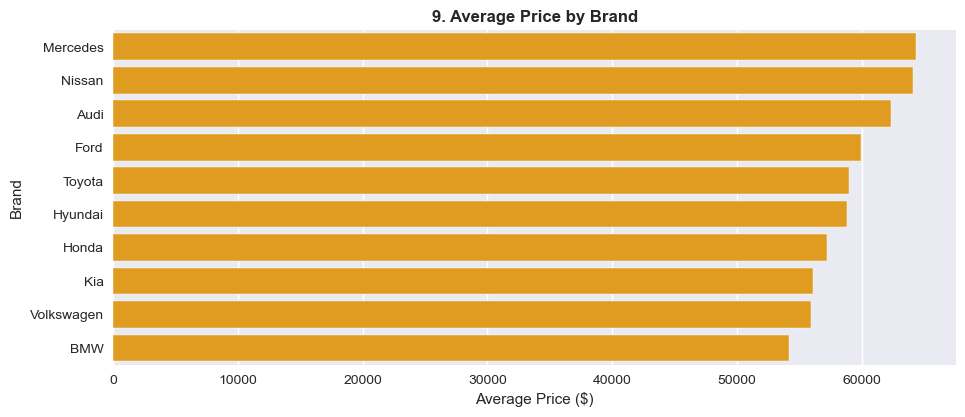

In [63]:
plt.figure(figsize=(50,20))
plt.subplot(4, 4, 9)
df['Brand'] = df['Brand'].str.split().str[0]
brand_price = df.groupby('Brand')['Price_USD'].mean().sort_values(ascending=False)
sns.barplot(x=brand_price.values, y=brand_price.index, color='orange')
plt.title('9. Average Price by Brand', fontweight='bold')
plt.xlabel('Average Price ($)')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kia'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Volkswagen'),
  Text(3, 0, 'Ford'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'Toyota')])

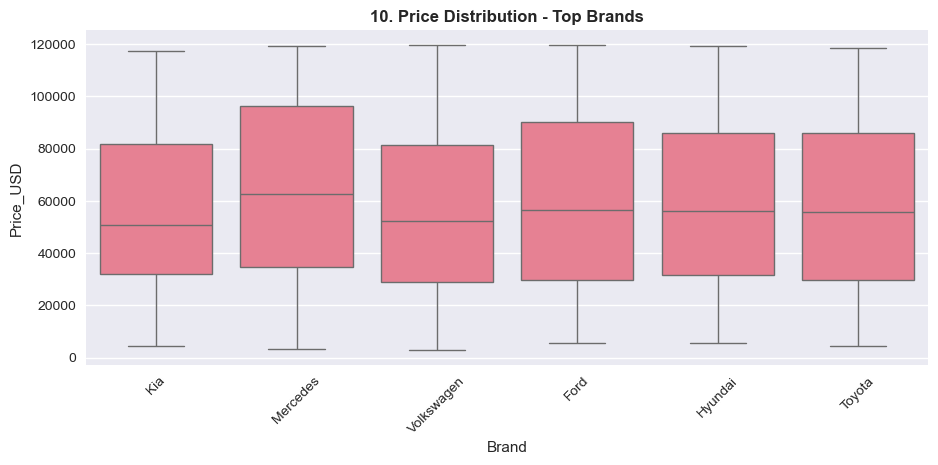

In [64]:
plt.figure(figsize=(50,20))
plt.subplot(4, 4, 10)
top_brands = df['Brand'].value_counts().head(6).index
sns.boxplot(data=df[df['Brand'].isin(top_brands)], x='Brand', y='Price_USD')
plt.title('10. Price Distribution - Top Brands', fontweight='bold')
plt.xticks(rotation=45)

Text(0.5, 1.0, ' Feature Correlation with Price')

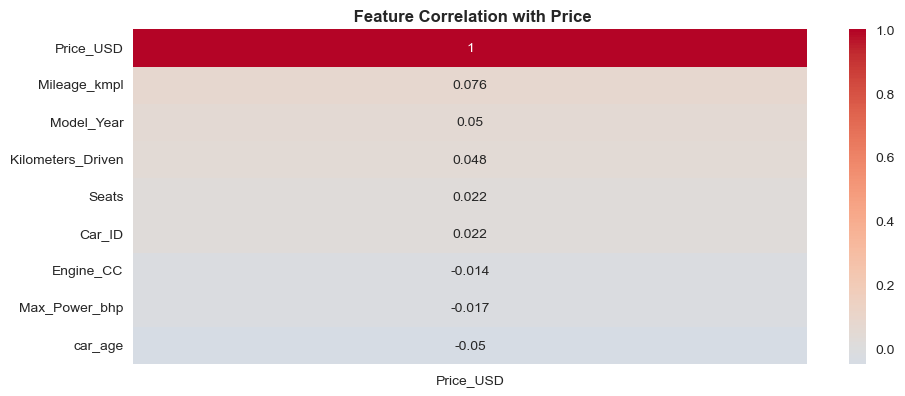

In [65]:
plt.figure(figsize=(50,20))
plt.subplot(4, 4, 11)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix[['Price_USD']].sort_values('Price_USD', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title(' Feature Correlation with Price', fontweight='bold')

Text(0.5, 1.0, ' Engine_CC vs Max_Power_bhp\n(Color = Price($))')

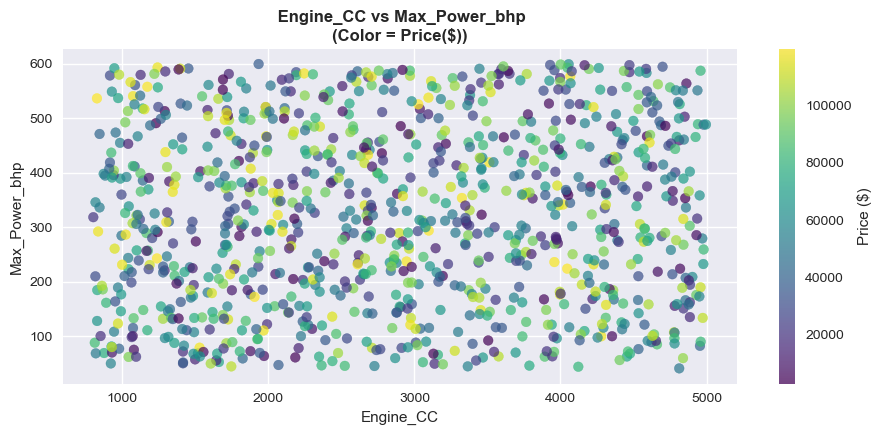

In [66]:
plt.figure(figsize=(50,20))
plt.subplot(4, 4, 13)
scatter = plt.scatter(df['Engine_CC'], df['Max_Power_bhp'], c=df['Price_USD'], 
                     cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Price ($)')
plt.xlabel('Engine_CC')
plt.ylabel('Max_Power_bhp')
plt.title(' Engine_CC vs Max_Power_bhp\n(Color = Price($))', fontweight='bold')


C:\Users\user\AppData\Local\Temp\ipykernel_3620\1311935831.py:5: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.



Text(0.5, 0, 'Index')

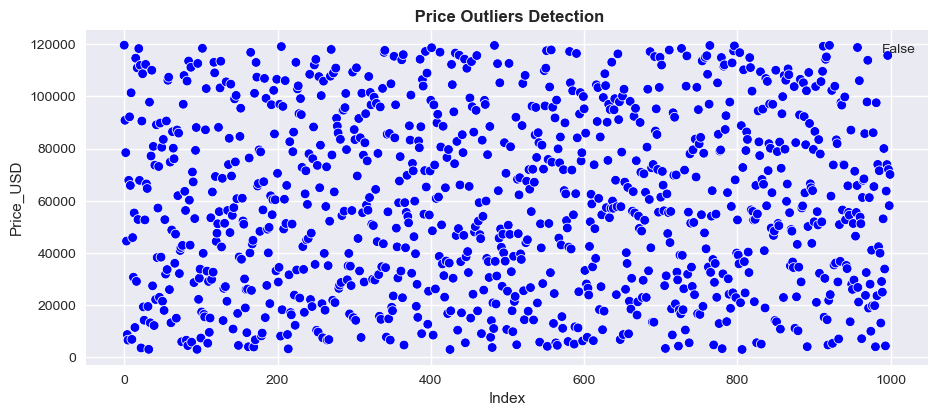

In [67]:
plt.figure(figsize=(50,20))
plt.subplot(4, 4, 14)
z_scores = stats.zscore(df['Price_USD'])
outliers = np.abs(z_scores) > 3
sns.scatterplot(x=df.index, y=df['Price_USD'], hue=outliers, palette=['blue', 'red'])
plt.title(' Price Outliers Detection', fontweight='bold')
plt.xlabel('Index')

C:\Users\user\AppData\Local\Temp\ipykernel_3620\2290537929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Fuel_Type', y='Price_USD', ax=axes[0,0],
C:\Users\user\AppData\Local\Temp\ipykernel_3620\2290537929.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Transmission', y='Price_USD', ax=axes[0,1],
C:\Users\user\AppData\Local\Temp\ipykernel_3620\2290537929.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Owner_Type', y='Price_USD', ax=axes[1,0],
C:\Users\user\AppData\Local\Temp\ipykernel_3620\2

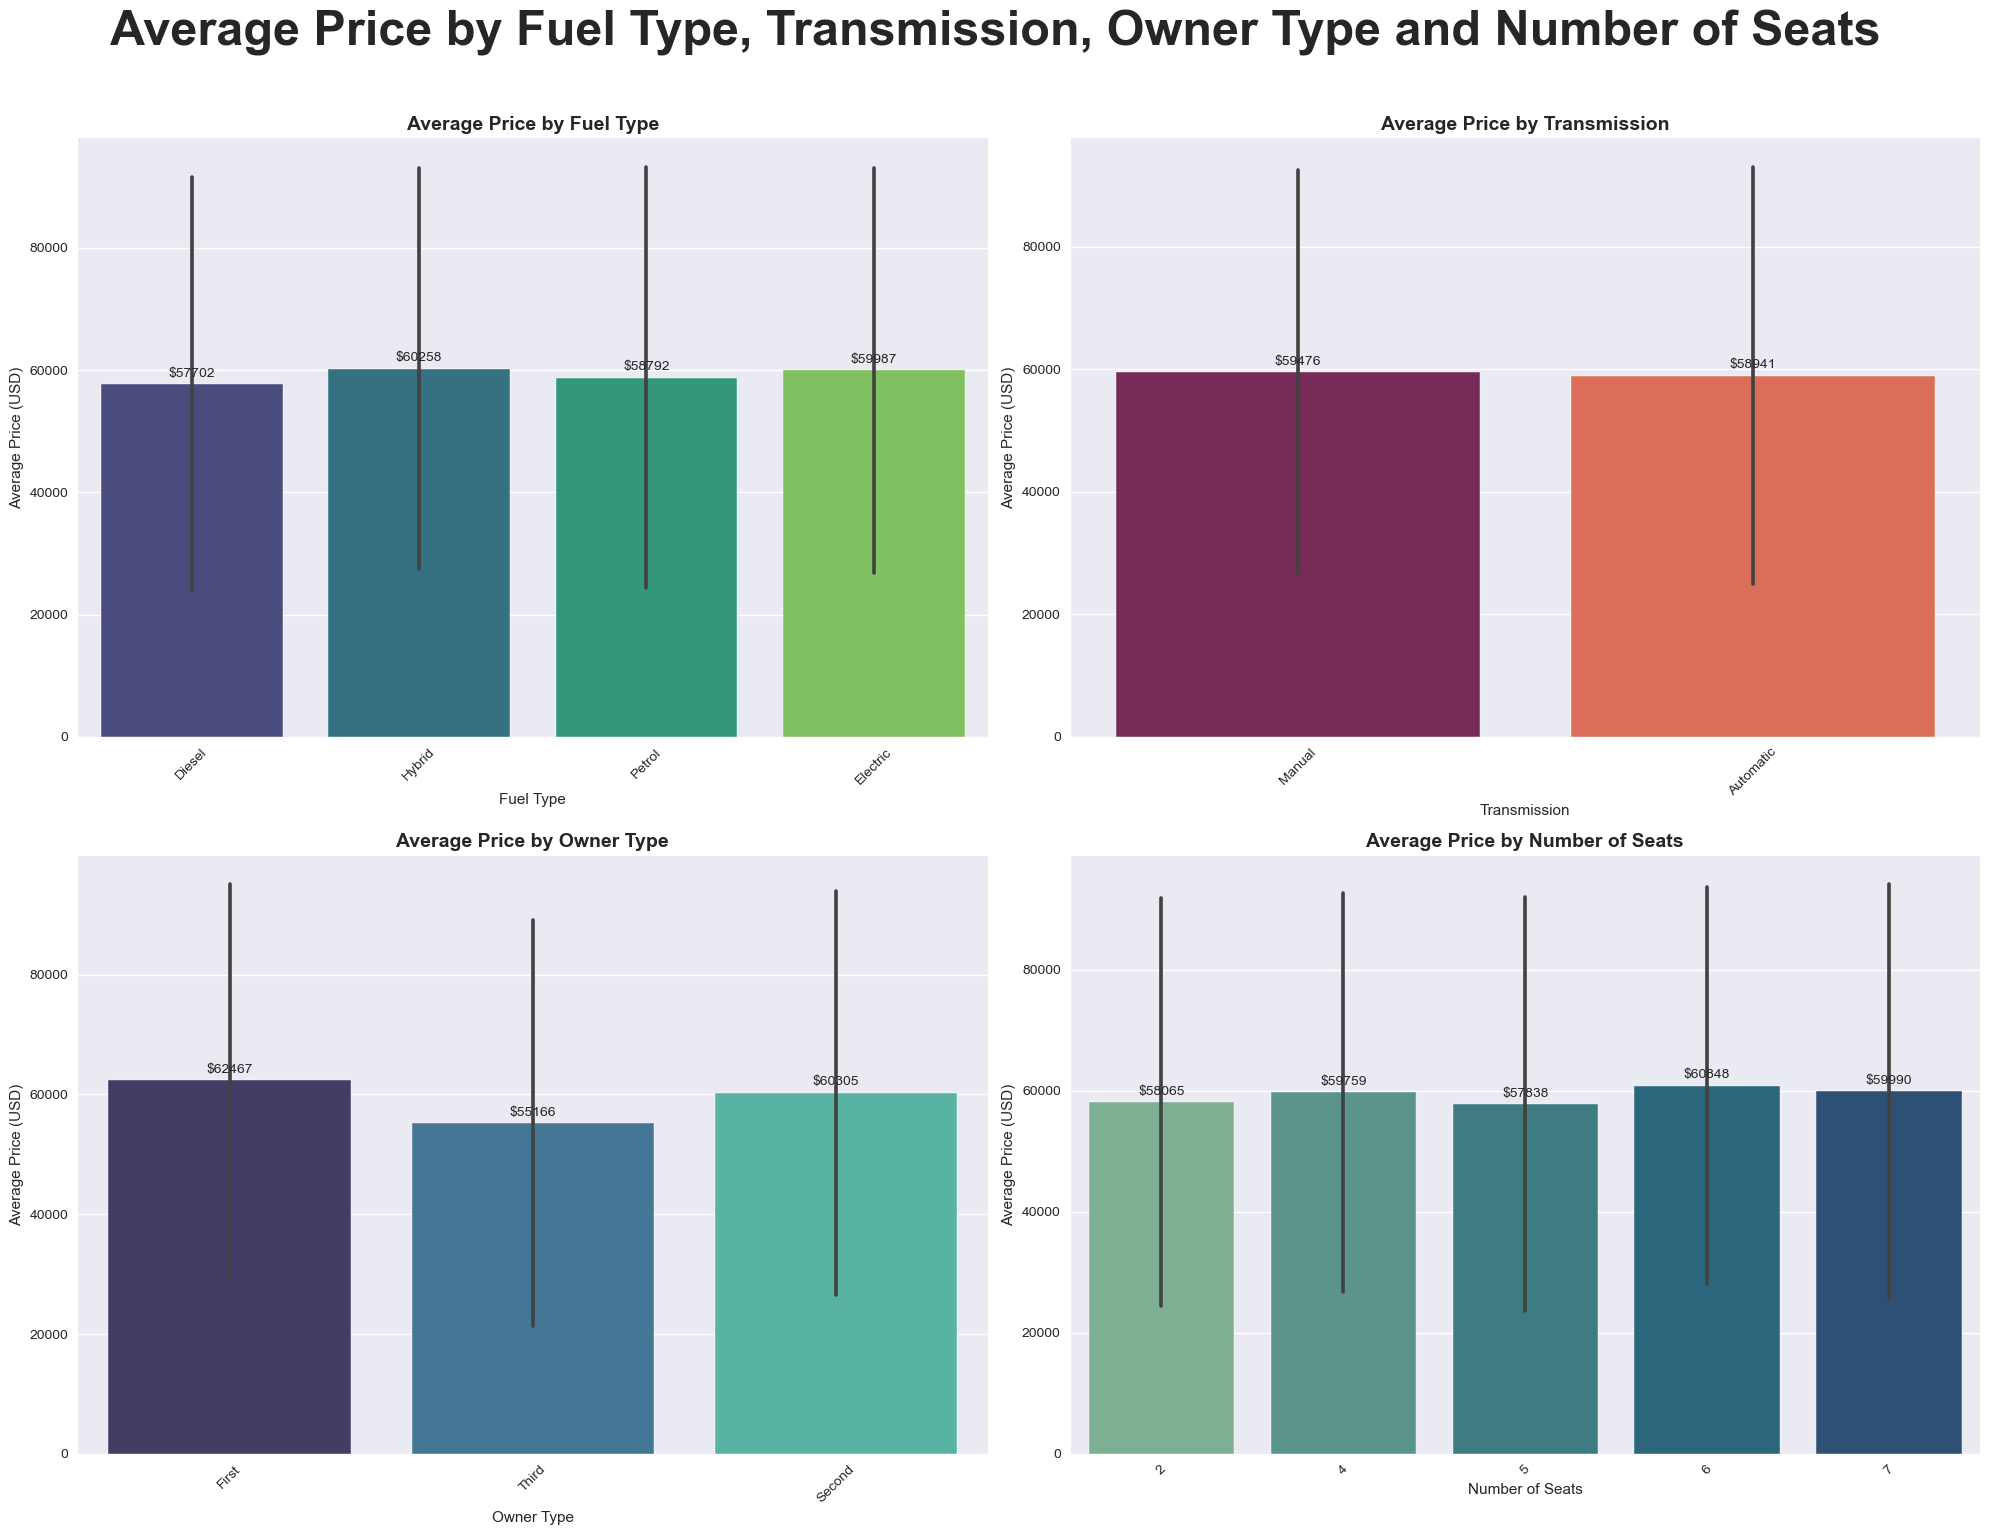

In [27]:
fig2, axes = plt.subplots(2, 2, figsize=(20, 15))
plt.suptitle('Average Price by Fuel Type, Transmission, Owner Type and Number of Seats', 
             fontweight='bold', fontsize=35, y=1.02)
sns.barplot(data=df, x='Fuel_Type', y='Price_USD', ax=axes[0,0], 
            estimator=np.mean, errorbar='sd', palette='viridis')
axes[0,0].set_title('Average Price by Fuel Type', fontweight='bold', fontsize=14)
axes[0,0].set_xlabel('Fuel Type')
axes[0,0].set_ylabel('Average Price (USD)')
axes[0,0].tick_params(axis='x', rotation=45)
for container in axes[0,0].containers:
    axes[0,0].bar_label(container, fmt='$%.0f', padding=3)
sns.barplot(data=df, x='Transmission', y='Price_USD', ax=axes[0,1],
            estimator=np.mean, errorbar='sd', palette='rocket')
axes[0,1].set_title('Average Price by Transmission', fontweight='bold', fontsize=14)
axes[0,1].set_xlabel('Transmission')
axes[0,1].set_ylabel('Average Price (USD)')
axes[0,1].tick_params(axis='x', rotation=45)
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt='$%.0f', padding=3)
sns.barplot(data=df, x='Owner_Type', y='Price_USD', ax=axes[1,0],
            estimator=np.mean, errorbar='sd', palette='mako')
axes[1,0].set_title('Average Price by Owner Type', fontweight='bold', fontsize=14)
axes[1,0].set_xlabel('Owner Type')
axes[1,0].set_ylabel('Average Price (USD)')
axes[1,0].tick_params(axis='x', rotation=45)
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, fmt='$%.0f', padding=3)
sns.barplot(data=df, x='Seats', y='Price_USD', ax=axes[1,1],
            estimator=np.mean, errorbar='sd', palette='crest', order=sorted(df['Seats'].unique()))
axes[1,1].set_title('Average Price by Number of Seats', fontweight='bold', fontsize=14)
axes[1,1].set_xlabel('Number of Seats')
axes[1,1].set_ylabel('Average Price (USD)')
axes[1,1].tick_params(axis='x', rotation=45)
for container in axes[1,1].containers:
    axes[1,1].bar_label(container, fmt='$%.0f', padding=3)
plt.tight_layout()
plt.show()

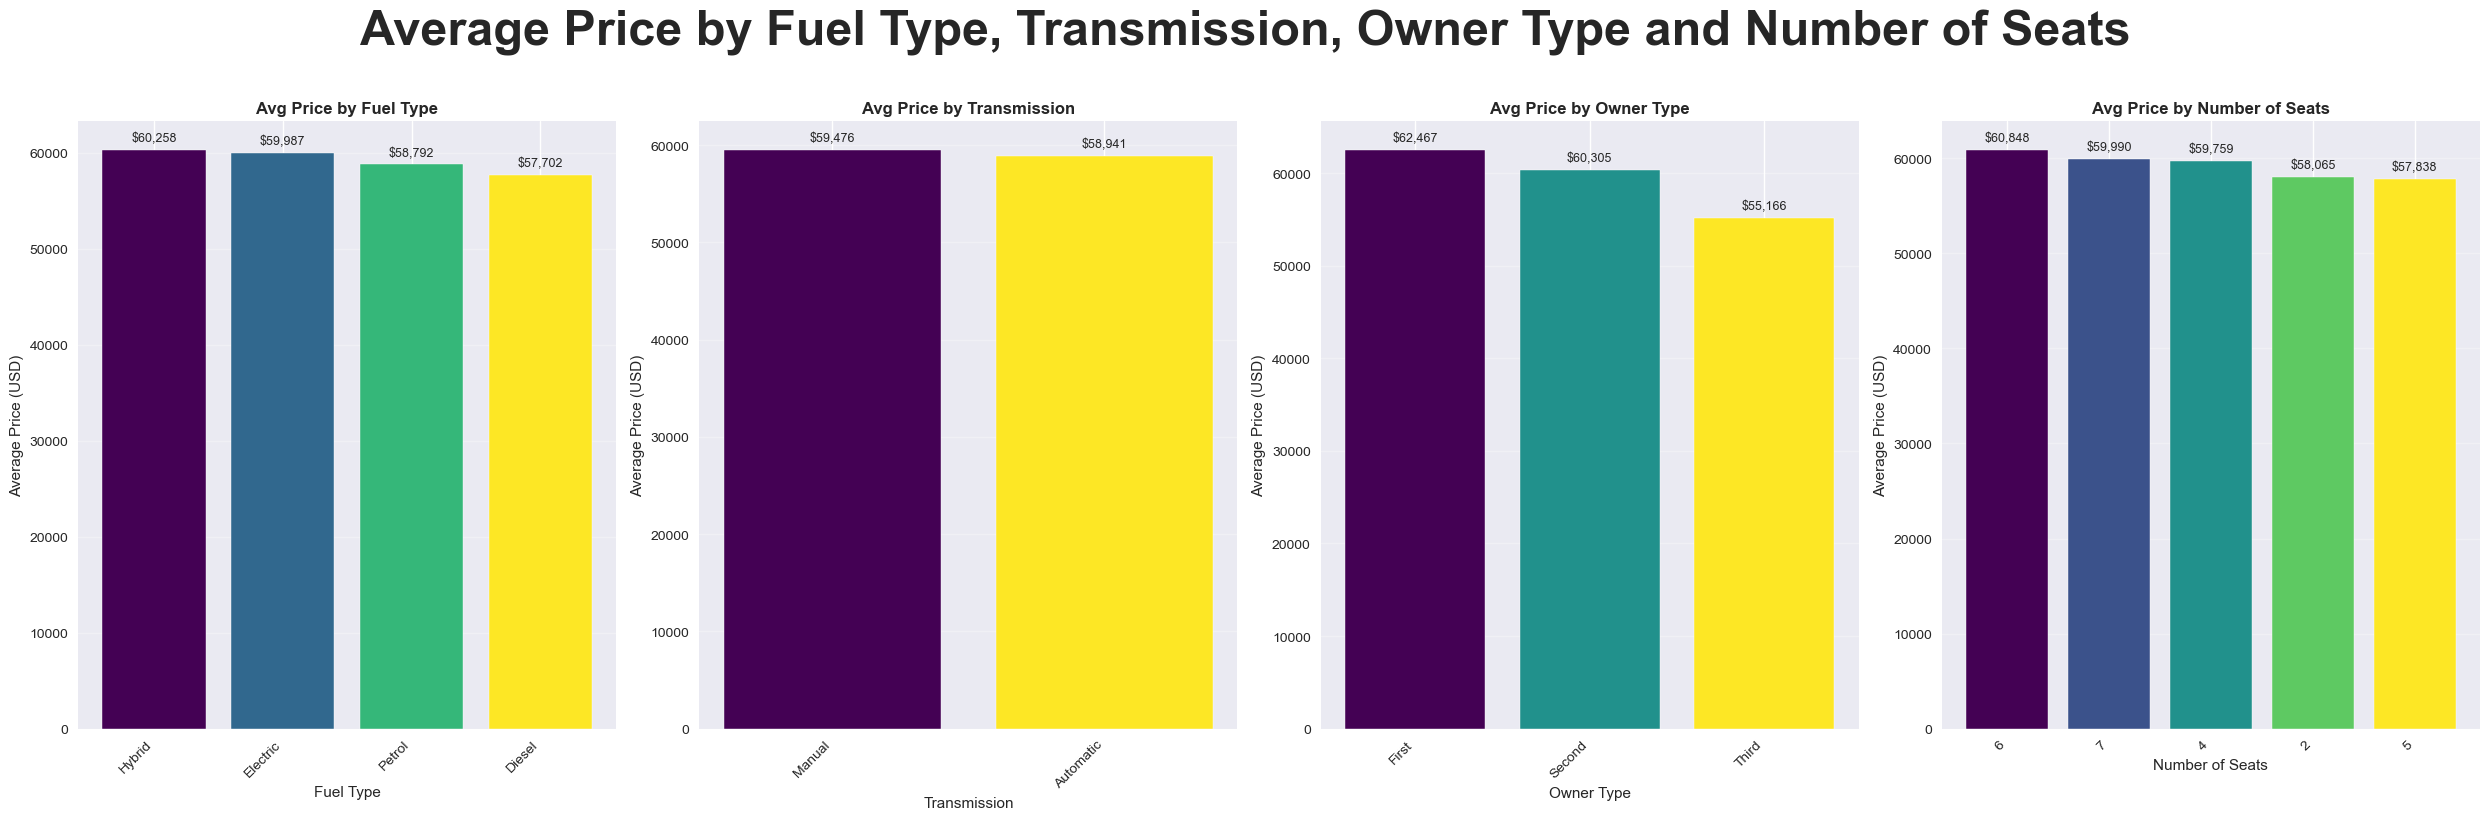

In [68]:
fig, axes = plt.subplots(1, 4, figsize=(25, 8))
plt.suptitle('Average Price by Fuel Type, Transmission, Owner Type and Number of Seats', 
             fontweight='bold', fontsize=35, y=1.02)
for i, (feature, title) in enumerate([
    ('Fuel_Type', 'Fuel Type'),
    ('Transmission', 'Transmission'),
    ('Owner_Type', 'Owner Type'),
    ('Seats', 'Number of Seats')
]):
    avg_prices = df.groupby(feature)['Price_USD'].mean().sort_values(ascending=False)
    bars = axes[i].bar(range(len(avg_prices)), avg_prices.values, color=plt.cm.viridis(np.linspace(0, 1, len(avg_prices))))
    axes[i].set_title(f'Avg Price by {title}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Average Price (USD)')
    axes[i].set_xticks(range(len(avg_prices)))
    axes[i].set_xticklabels(avg_prices.index, rotation=45, ha='right')
    for bar, value in zip(bars, avg_prices.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + max(avg_prices.values)*0.01,
                    f'${value:,.0f}', ha='center', va='bottom', fontsize=9)
    axes[i].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

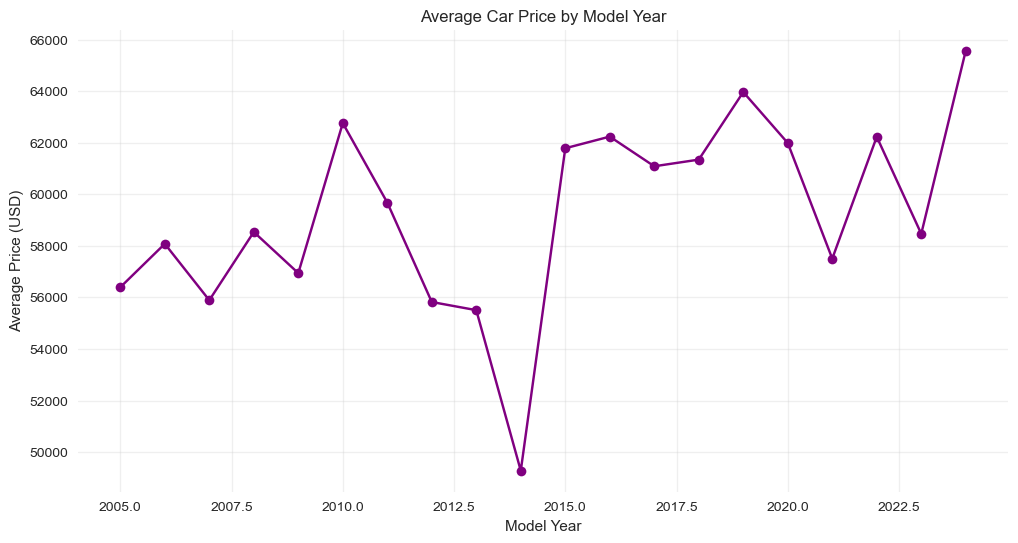

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
year_avg = df.groupby('Model_Year')['Price_USD'].mean()
plt.figure(figsize=(12,6))
year_avg.plot(kind='line', marker='o',color='purple')
plt.title('Average Car Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price (USD)')
plt.grid(True, alpha=0.3)
plt.show()

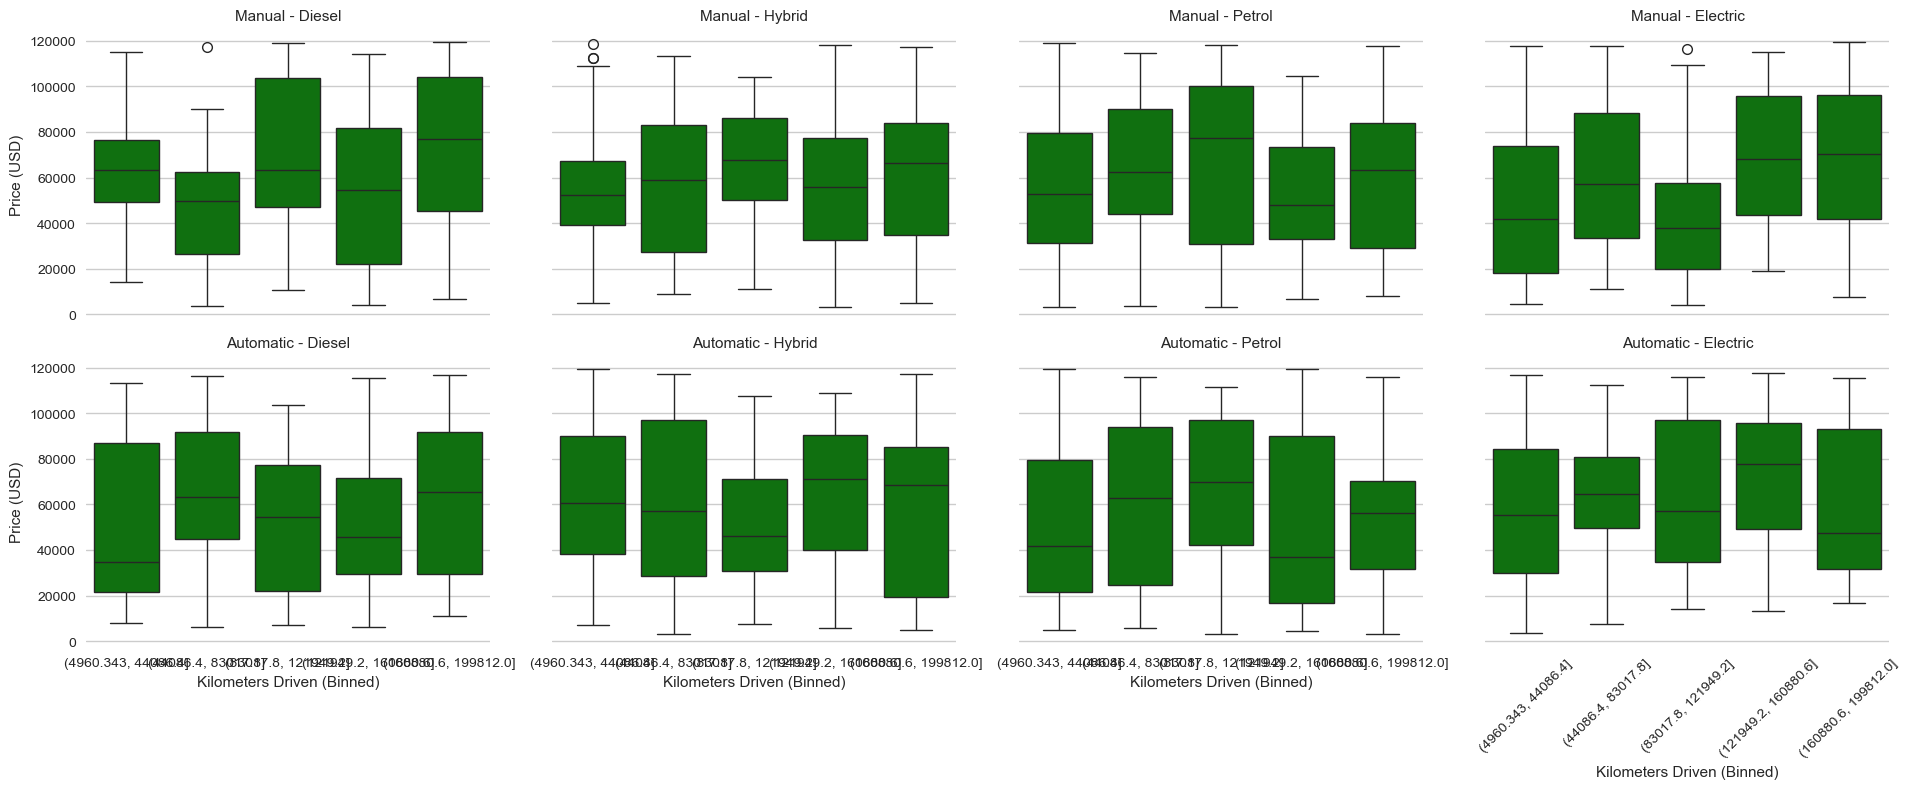

In [72]:
df['Km_Bin'] = pd.cut(df['Kilometers_Driven'], bins=5)
g = sns.FacetGrid(df, col='Fuel_Type', row='Transmission', height=4, aspect=1.2)
g.map(sns.boxplot, 'Km_Bin', 'Price_USD', order=sorted(df['Km_Bin'].unique()),color='green')
g.set_axis_labels('Kilometers Driven (Binned)', 'Price (USD)')
g.set_titles('{row_name} - {col_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()